# Project Name - RiceLeaf disease detection

* Rice plant is susceptible to diseases that may affect the quantity and quality of rice production.
Detection of these diseases by the farmers will require a great knowledge about the various disease
and how to identify them visually. 
* Monitoring these diseases, their occurrences and frequencies
are very important for early detection of the affected plants, their timely treatment, and most
importantly, for planning future strategies to prevent the diseases to minimize the losses. 
* CNN is an algorithm of deep learning techniques that has been successfully invoked for handling computer
vision issues such as picture classification, object segmentation, and image analysis.
* CNN has been used to address the classification of Rice leaf diseases accurate detection and classification of rice
leaf disease.


* The dataset provided contains 120 jpg images of disease-infected rice leaves. The images are grouped
  into 3 classes based on the type of disease. There are 40 images in each class. Classes

     * Leaf smut : small black linear lesions on leaf blades, leaf tips may turn grey and dry.
     
     * Bacterial blight : elongated lesions near the leaf tips and margins, and turns white to yellow
       and then grey due to fungal attack.
       
     * Brown spot : dark brown colored and round to oval shaped lesions on rice leaves.
     
* Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf
  blast, bacterial blight and brown spot.

* Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

# Import  Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from glob import glob 
from PIL import Image
from tqdm import tqdm
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.regularizers import l1
from keras.callbacks import ModelCheckpoint
from keras import models
from keras.utils import load_img, img_to_array

# Reading the images

In [2]:
 # Give dataset path
train_directory = r'D:\Computer courses\Internship project\PRCP-1001-RiceLeaf\Test_Data\Train'
test_directory = r'D:\Computer courses\Internship project\PRCP-1001-RiceLeaf\Test_Data\Test'

## Dataset creation

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
                train_directory,
                subset='training',
                color_mode='rgb',
                batch_size=10,
                image_size=(256, 256),
                shuffle=True,
                seed=100,
                validation_split=0.2)

Found 89 files belonging to 3 classes.
Using 72 files for training.


In [4]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(
                train_directory,
                subset='validation',
                color_mode='rgb',
                batch_size=4,
                image_size=(256, 256),
                shuffle=True,
                seed=100,
                validation_split=0.2)

Found 89 files belonging to 3 classes.
Using 17 files for validation.


In [5]:
class_names = train_dataset.class_names
class_names

['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

## Image visualization

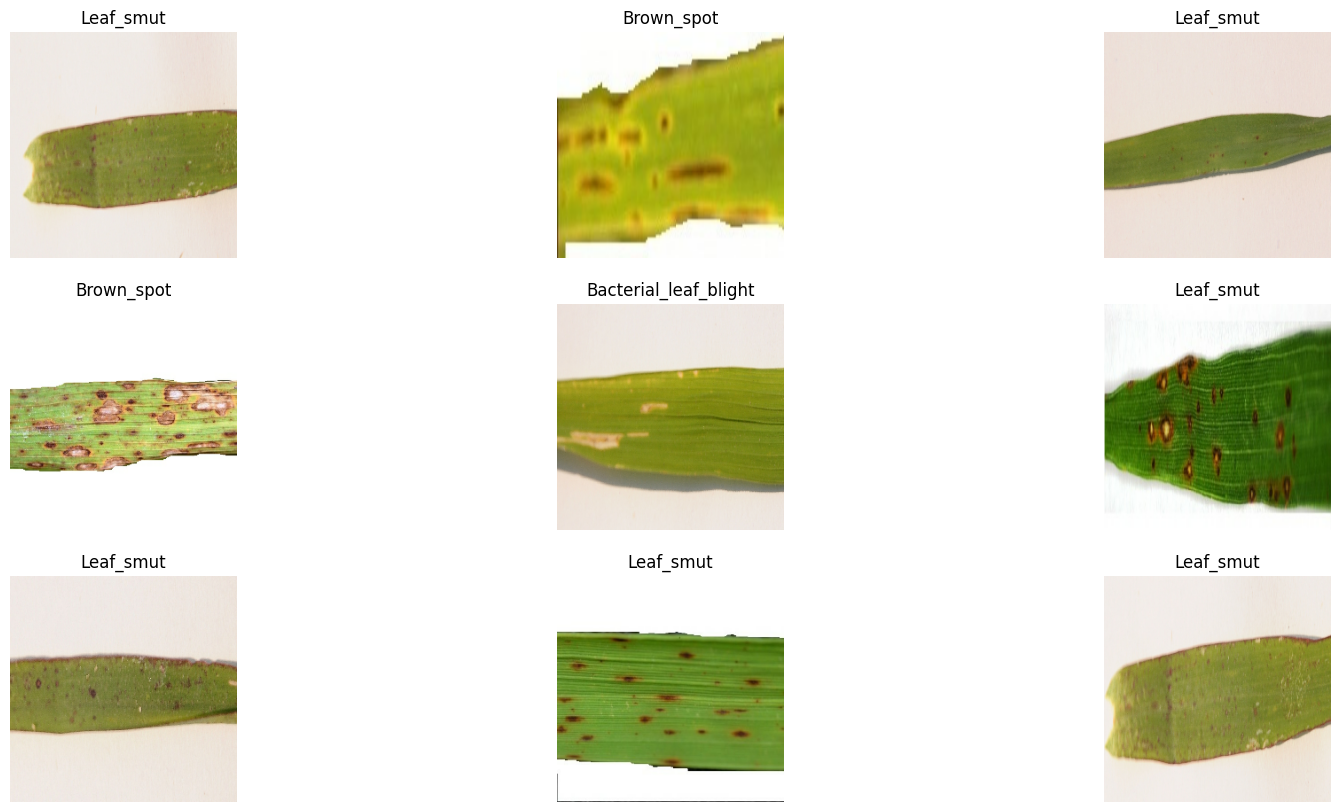

In [6]:
fig = plt.figure(figsize=(20,10))

for img, labels in train_dataset.take(17):
    for i in range(9):
        try:
            ax = plt.subplot(3,3,i+1)
            plt.imshow(img[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
        except Exception as e:  # in the interest in keeping the output clean...
                pass
              

## Data Augmentation

In [7]:
train_datagen = ImageDataGenerator(
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          rescale=1./255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='reflect')

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_set = train_datagen.flow_from_directory(
                                    train_directory,
                                    target_size=(256, 256),
                                    color_mode='rgb',
                                    class_mode='categorical',
                                    batch_size=32)

Found 89 images belonging to 3 classes.


In [10]:
valid_set = train_datagen.flow_from_directory(
                                    test_directory,
                                    target_size=(256, 256),
                                    color_mode='rgb',
                                    class_mode='categorical',
                                    batch_size=32)
#                                     shuffle=True,
#                                     seed=10)

Found 30 images belonging to 3 classes.


## CNN Model

### Optimizer Adam with learning rate - 0.0001

In [11]:
# Model creation
model = Sequential()

In [12]:
# Layer creation
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                 kernel_regularizer=l1(0.0001),
                 input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
          

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
      

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
         

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
         

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))          


model.add(Flatten())

model.add(Dense(700, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(200, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dense(100, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dense(3, activation='softmax'))

In [13]:
# Optimizer - weights & learning rate changes - to reduce loss
model.compile(loss='categorical_crossentropy', 
              optimizer = (tf.keras.optimizers.Adam(learning_rate=0.0001)), 
              metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [15]:
# Train the model
checkpoint = ModelCheckpoint(filepath = 'Riceleaf.h5', verbose = 1, save_best_only=True)

In [16]:
%%time
model_train = model.fit(train_set, 
                        epochs=500, 
                        batch_size = 32,
                        validation_data = valid_set, 
                        callbacks=[checkpoint],
                        verbose = 1)

Epoch 1/500
3/3 [==============================] - ETA: 0s - loss: 1.8175 - accuracy: 0.3371
Epoch 1: val_loss improved from inf to 1.81551, saving model to Riceleaf.h5
3/3 [==============================] - 10s 3s/step - loss: 1.8175 - accuracy: 0.3371 - val_loss: 1.8155 - val_accuracy: 0.4667
Epoch 2/500
3/3 [==============================] - ETA: 0s - loss: 1.8165 - accuracy: 0.3371
Epoch 2: val_loss improved from 1.81551 to 1.81186, saving model to Riceleaf.h5
3/3 [==============================] - 6s 2s/step - loss: 1.8165 - accuracy: 0.3371 - val_loss: 1.8119 - val_accuracy: 0.3333
Epoch 3/500
3/3 [==============================] - ETA: 0s - loss: 1.8141 - accuracy: 0.2697
Epoch 3: val_loss improved from 1.81186 to 1.80796, saving model to Riceleaf.h5
3/3 [==============================] - 6s 2s/step - loss: 1.8141 - accuracy: 0.2697 - val_loss: 1.8080 - val_accuracy: 0.3333
Epoch 4/500
3/3 [==============================] - ETA: 0s - loss: 1.8061 - accuracy: 0.3258
Epoch 4: val_

Epoch 30/500
3/3 [==============================] - ETA: 0s - loss: 1.6421 - accuracy: 0.4944
Epoch 30: val_loss did not improve from 1.76933
3/3 [==============================] - 8s 3s/step - loss: 1.6421 - accuracy: 0.4944 - val_loss: 1.8246 - val_accuracy: 0.4000
Epoch 31/500
3/3 [==============================] - ETA: 0s - loss: 1.6164 - accuracy: 0.5730
Epoch 31: val_loss did not improve from 1.76933
3/3 [==============================] - 6s 2s/step - loss: 1.6164 - accuracy: 0.5730 - val_loss: 1.8911 - val_accuracy: 0.3333
Epoch 32/500
3/3 [==============================] - ETA: 0s - loss: 1.5844 - accuracy: 0.4607
Epoch 32: val_loss did not improve from 1.76933
3/3 [==============================] - 7s 2s/step - loss: 1.5844 - accuracy: 0.4607 - val_loss: 1.8330 - val_accuracy: 0.4333
Epoch 33/500
3/3 [==============================] - ETA: 0s - loss: 1.5825 - accuracy: 0.5281
Epoch 33: val_loss did not improve from 1.76933
3/3 [==============================] - 6s 2s/step - lo

3/3 [==============================] - 6s 2s/step - loss: 1.3269 - accuracy: 0.6854 - val_loss: 1.9100 - val_accuracy: 0.4667
Epoch 61/500
3/3 [==============================] - ETA: 0s - loss: 1.3643 - accuracy: 0.6180
Epoch 61: val_loss did not improve from 1.62534
3/3 [==============================] - 6s 2s/step - loss: 1.3643 - accuracy: 0.6180 - val_loss: 1.8090 - val_accuracy: 0.4333
Epoch 62/500
3/3 [==============================] - ETA: 0s - loss: 1.2905 - accuracy: 0.6404
Epoch 62: val_loss did not improve from 1.62534
3/3 [==============================] - 6s 2s/step - loss: 1.2905 - accuracy: 0.6404 - val_loss: 2.1077 - val_accuracy: 0.4333
Epoch 63/500
3/3 [==============================] - ETA: 0s - loss: 1.2593 - accuracy: 0.6854
Epoch 63: val_loss did not improve from 1.62534
3/3 [==============================] - 6s 2s/step - loss: 1.2593 - accuracy: 0.6854 - val_loss: 1.9708 - val_accuracy: 0.4333
Epoch 64/500
3/3 [==============================] - ETA: 0s - loss: 1.

3/3 [==============================] - ETA: 0s - loss: 0.7556 - accuracy: 0.8764
Epoch 120: val_loss did not improve from 1.13032
3/3 [==============================] - 6s 2s/step - loss: 0.7556 - accuracy: 0.8764 - val_loss: 1.3970 - val_accuracy: 0.7000
Epoch 121/500
3/3 [==============================] - ETA: 0s - loss: 0.7928 - accuracy: 0.8427
Epoch 121: val_loss did not improve from 1.13032
3/3 [==============================] - 6s 2s/step - loss: 0.7928 - accuracy: 0.8427 - val_loss: 1.3222 - val_accuracy: 0.7333
Epoch 122/500
3/3 [==============================] - ETA: 0s - loss: 0.7325 - accuracy: 0.8764
Epoch 122: val_loss did not improve from 1.13032
3/3 [==============================] - 6s 2s/step - loss: 0.7325 - accuracy: 0.8764 - val_loss: 1.6338 - val_accuracy: 0.7000
Epoch 123/500
3/3 [==============================] - ETA: 0s - loss: 0.8213 - accuracy: 0.7978
Epoch 123: val_loss did not improve from 1.13032
3/3 [==============================] - 6s 2s/step - loss: 0.

3/3 [==============================] - 6s 2s/step - loss: 0.8373 - accuracy: 0.8202 - val_loss: 2.3214 - val_accuracy: 0.7000
Epoch 151/500
3/3 [==============================] - ETA: 0s - loss: 0.8383 - accuracy: 0.7978
Epoch 151: val_loss did not improve from 1.13032
3/3 [==============================] - 6s 2s/step - loss: 0.8383 - accuracy: 0.7978 - val_loss: 1.2064 - val_accuracy: 0.7667
Epoch 152/500
3/3 [==============================] - ETA: 0s - loss: 0.8126 - accuracy: 0.8090
Epoch 152: val_loss improved from 1.13032 to 1.07652, saving model to Riceleaf.h5
3/3 [==============================] - 7s 2s/step - loss: 0.8126 - accuracy: 0.8090 - val_loss: 1.0765 - val_accuracy: 0.7000
Epoch 153/500
3/3 [==============================] - ETA: 0s - loss: 0.7609 - accuracy: 0.8315
Epoch 153: val_loss did not improve from 1.07652
3/3 [==============================] - 6s 2s/step - loss: 0.7609 - accuracy: 0.8315 - val_loss: 1.2726 - val_accuracy: 0.8000
Epoch 154/500
3/3 [============

Epoch 181/500
3/3 [==============================] - ETA: 0s - loss: 0.5952 - accuracy: 0.8876
Epoch 181: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/step - loss: 0.5952 - accuracy: 0.8876 - val_loss: 1.3666 - val_accuracy: 0.8000
Epoch 182/500
3/3 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.8989
Epoch 182: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/step - loss: 0.6036 - accuracy: 0.8989 - val_loss: 1.9516 - val_accuracy: 0.8000
Epoch 183/500
3/3 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.9213
Epoch 183: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/step - loss: 0.5680 - accuracy: 0.9213 - val_loss: 1.6202 - val_accuracy: 0.7667
Epoch 184/500
3/3 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.8764
Epoch 184: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/s

3/3 [==============================] - 6s 2s/step - loss: 0.5549 - accuracy: 0.8989 - val_loss: 1.5437 - val_accuracy: 0.7667
Epoch 242/500
3/3 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.9551
Epoch 242: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/step - loss: 0.4761 - accuracy: 0.9551 - val_loss: 2.0385 - val_accuracy: 0.6667
Epoch 243/500
3/3 [==============================] - ETA: 0s - loss: 0.5072 - accuracy: 0.9101
Epoch 243: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/step - loss: 0.5072 - accuracy: 0.9101 - val_loss: 1.8683 - val_accuracy: 0.7333
Epoch 244/500
3/3 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.9438
Epoch 244: val_loss did not improve from 0.95750
3/3 [==============================] - 6s 2s/step - loss: 0.4728 - accuracy: 0.9438 - val_loss: 2.0979 - val_accuracy: 0.7333
Epoch 245/500
3/3 [==============================] - ETA: 0s - l

Epoch 272/500
3/3 [==============================] - ETA: 0s - loss: 0.4658 - accuracy: 0.9551
Epoch 272: val_loss improved from 0.95750 to 0.85283, saving model to Riceleaf.h5
3/3 [==============================] - 6s 2s/step - loss: 0.4658 - accuracy: 0.9551 - val_loss: 0.8528 - val_accuracy: 0.8667
Epoch 273/500
3/3 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.9326
Epoch 273: val_loss did not improve from 0.85283
3/3 [==============================] - 6s 2s/step - loss: 0.4424 - accuracy: 0.9326 - val_loss: 1.1156 - val_accuracy: 0.8333
Epoch 274/500
3/3 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.9663
Epoch 274: val_loss did not improve from 0.85283
3/3 [==============================] - 6s 2s/step - loss: 0.4241 - accuracy: 0.9663 - val_loss: 1.1656 - val_accuracy: 0.8000
Epoch 275/500
3/3 [==============================] - ETA: 0s - loss: 0.4558 - accuracy: 0.9438
Epoch 275: val_loss did not improve from 0.85283
3/3 [========

3/3 [==============================] - 6s 2s/step - loss: 0.4258 - accuracy: 0.9551 - val_loss: 1.9767 - val_accuracy: 0.8000
Epoch 333/500
3/3 [==============================] - ETA: 0s - loss: 0.4166 - accuracy: 0.9663
Epoch 333: val_loss did not improve from 0.85283
3/3 [==============================] - 6s 2s/step - loss: 0.4166 - accuracy: 0.9663 - val_loss: 1.6350 - val_accuracy: 0.7667
Epoch 334/500
3/3 [==============================] - ETA: 0s - loss: 0.4398 - accuracy: 0.9551
Epoch 334: val_loss did not improve from 0.85283
3/3 [==============================] - 6s 2s/step - loss: 0.4398 - accuracy: 0.9551 - val_loss: 1.6796 - val_accuracy: 0.8333
Epoch 335/500
3/3 [==============================] - ETA: 0s - loss: 0.4231 - accuracy: 0.9438
Epoch 335: val_loss did not improve from 0.85283
3/3 [==============================] - 6s 2s/step - loss: 0.4231 - accuracy: 0.9438 - val_loss: 1.8484 - val_accuracy: 0.6667
Epoch 336/500
3/3 [==============================] - ETA: 0s - l

Epoch 363/500
3/3 [==============================] - ETA: 0s - loss: 0.4168 - accuracy: 0.9438
Epoch 363: val_loss did not improve from 0.83460
3/3 [==============================] - 6s 2s/step - loss: 0.4168 - accuracy: 0.9438 - val_loss: 1.5498 - val_accuracy: 0.5667
Epoch 364/500
3/3 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.9663
Epoch 364: val_loss did not improve from 0.83460
3/3 [==============================] - 6s 2s/step - loss: 0.4037 - accuracy: 0.9663 - val_loss: 1.4162 - val_accuracy: 0.8000
Epoch 365/500
3/3 [==============================] - ETA: 0s - loss: 0.3655 - accuracy: 0.9888
Epoch 365: val_loss did not improve from 0.83460
3/3 [==============================] - 6s 2s/step - loss: 0.3655 - accuracy: 0.9888 - val_loss: 1.5329 - val_accuracy: 0.7667
Epoch 366/500
3/3 [==============================] - ETA: 0s - loss: 0.4171 - accuracy: 0.9551
Epoch 366: val_loss did not improve from 0.83460
3/3 [==============================] - 7s 2s/s

3/3 [==============================] - 6s 2s/step - loss: 0.3518 - accuracy: 0.9775 - val_loss: 1.4701 - val_accuracy: 0.7333
Epoch 424/500
3/3 [==============================] - ETA: 0s - loss: 0.3685 - accuracy: 0.9775
Epoch 424: val_loss did not improve from 0.72464
3/3 [==============================] - 7s 2s/step - loss: 0.3685 - accuracy: 0.9775 - val_loss: 1.5372 - val_accuracy: 0.7333
Epoch 425/500
3/3 [==============================] - ETA: 0s - loss: 0.3708 - accuracy: 0.9663
Epoch 425: val_loss did not improve from 0.72464
3/3 [==============================] - 6s 2s/step - loss: 0.3708 - accuracy: 0.9663 - val_loss: 1.6649 - val_accuracy: 0.8333
Epoch 426/500
3/3 [==============================] - ETA: 0s - loss: 0.3786 - accuracy: 0.9438
Epoch 426: val_loss did not improve from 0.72464
3/3 [==============================] - 7s 2s/step - loss: 0.3786 - accuracy: 0.9438 - val_loss: 1.6925 - val_accuracy: 0.7333
Epoch 427/500
3/3 [==============================] - ETA: 0s - l

Epoch 454/500
3/3 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.9438
Epoch 454: val_loss did not improve from 0.72464
3/3 [==============================] - 7s 2s/step - loss: 0.3850 - accuracy: 0.9438 - val_loss: 1.1117 - val_accuracy: 0.6333
Epoch 455/500
3/3 [==============================] - ETA: 0s - loss: 0.4162 - accuracy: 0.9438
Epoch 455: val_loss did not improve from 0.72464
3/3 [==============================] - 6s 2s/step - loss: 0.4162 - accuracy: 0.9438 - val_loss: 1.1833 - val_accuracy: 0.7333
Epoch 456/500
3/3 [==============================] - ETA: 0s - loss: 0.3641 - accuracy: 0.9663
Epoch 456: val_loss did not improve from 0.72464
3/3 [==============================] - 6s 2s/step - loss: 0.3641 - accuracy: 0.9663 - val_loss: 1.1907 - val_accuracy: 0.7000
Epoch 457/500
3/3 [==============================] - ETA: 0s - loss: 0.3455 - accuracy: 0.9888
Epoch 457: val_loss did not improve from 0.72464
3/3 [==============================] - 6s 2s/s

# Checking the Train score,accuracy,loss

In [17]:
model.load_weights('Riceleaf.h5')

In [18]:
tscore = model.evaluate(train_set, verbose=0)
taccuracy = 100 * tscore[1]
tloss = 100 * tscore[0]
print(tscore)
print(tloss)
print(taccuracy)

[0.37816834449768066, 0.966292142868042]
37.816834449768066
96.6292142868042


# Checking the Validation score,accuracy,loss

In [19]:
vscore = model.evaluate(valid_set, verbose=0)
vaccuracy = 100 * vscore[1]
vloss = 100 * vscore[0]
print(vscore)
print(vloss)
print(vaccuracy)

[0.9017657041549683, 0.7666666507720947]
90.17657041549683
76.66666507720947


# Visualizing the train and validation loss

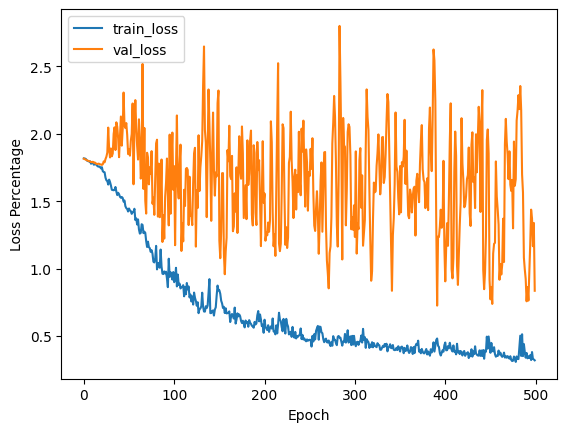

In [20]:
plt.plot(model_train.history['loss'], label='train_loss')
plt.plot(model_train.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Percentage')
plt.legend()
plt.show()

# Visualizing the train and validation accuracy

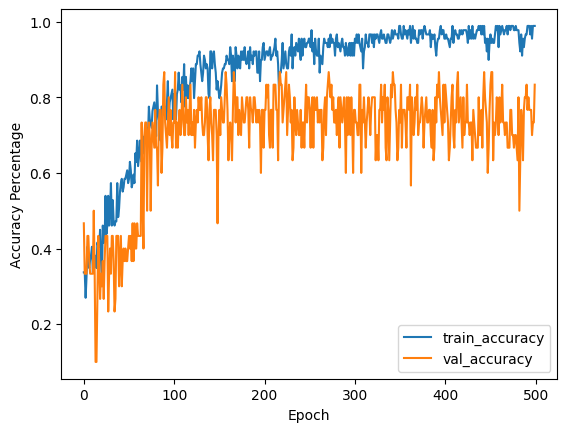

In [21]:
plt.plot(model_train.history['accuracy'], label='train_accuracy')
plt.plot(model_train.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Percentage')
plt.legend()
plt.show()

# CNN Model

### Optimizer Adam with learning rate - 0.0005

In [22]:
# Model creation
model1 = Sequential()

In [23]:
# Layer creation
model1.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                 kernel_regularizer=l1(0.0001),
                 input_shape=(256,256,3)))

model1.add(MaxPooling2D(pool_size=2))


model1.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
         

model1.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
          

model1.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
          

model1.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
         

model1.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
          


model1.add(Flatten())

model1.add(Dense(700, activation='relu'))
model1.add(Dropout(0.4))

model1.add(Dense(200, activation='relu', kernel_regularizer=l1(0.0001)))
model1.add(Dense(100, activation='relu', kernel_regularizer=l1(0.0001)))
model1.add(Dense(3, activation='softmax'))

In [24]:
# Optimizer - weights & learning rate changes - to reduce loss
model1.compile(loss='categorical_crossentropy', 
              optimizer = (tf.keras.optimizers.Adam(learning_rate=0.0005)), 
              metrics = ['accuracy'])

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)      

In [26]:
# Training the model 
checkpoint = ModelCheckpoint(filepath = 'Riceleaf1.h5', verbose = 1, save_best_only=True)

In [27]:
%%time
model_train1 = model1.fit(train_set, 
                        epochs=500, 
                        batch_size = 32,
                        validation_data = valid_set, 
                        callbacks=[checkpoint],
                        verbose = 1)

Epoch 1/500
3/3 [==============================] - ETA: 0s - loss: 1.8173 - accuracy: 0.3708
Epoch 1: val_loss improved from inf to 1.80661, saving model to Riceleaf1.h5
3/3 [==============================] - 9s 3s/step - loss: 1.8173 - accuracy: 0.3708 - val_loss: 1.8066 - val_accuracy: 0.3333
Epoch 2/500
3/3 [==============================] - ETA: 0s - loss: 1.8012 - accuracy: 0.3371
Epoch 2: val_loss improved from 1.80661 to 1.78608, saving model to Riceleaf1.h5
3/3 [==============================] - 6s 2s/step - loss: 1.8012 - accuracy: 0.3371 - val_loss: 1.7861 - val_accuracy: 0.3333
Epoch 3/500
3/3 [==============================] - ETA: 0s - loss: 1.7811 - accuracy: 0.2921
Epoch 3: val_loss improved from 1.78608 to 1.77413, saving model to Riceleaf1.h5
3/3 [==============================] - 7s 2s/step - loss: 1.7811 - accuracy: 0.2921 - val_loss: 1.7741 - val_accuracy: 0.3333
Epoch 4/500
3/3 [==============================] - ETA: 0s - loss: 1.7705 - accuracy: 0.2472
Epoch 4: va

Epoch 30/500
3/3 [==============================] - ETA: 0s - loss: 1.2138 - accuracy: 0.5730
Epoch 30: val_loss did not improve from 1.40424
3/3 [==============================] - 6s 2s/step - loss: 1.2138 - accuracy: 0.5730 - val_loss: 1.8290 - val_accuracy: 0.3667
Epoch 31/500
3/3 [==============================] - ETA: 0s - loss: 1.2170 - accuracy: 0.5393
Epoch 31: val_loss improved from 1.40424 to 1.27404, saving model to Riceleaf1.h5
3/3 [==============================] - 6s 2s/step - loss: 1.2170 - accuracy: 0.5393 - val_loss: 1.2740 - val_accuracy: 0.5333
Epoch 32/500
3/3 [==============================] - ETA: 0s - loss: 1.1721 - accuracy: 0.6067
Epoch 32: val_loss did not improve from 1.27404
3/3 [==============================] - 6s 2s/step - loss: 1.1721 - accuracy: 0.6067 - val_loss: 1.8749 - val_accuracy: 0.4667
Epoch 33/500
3/3 [==============================] - ETA: 0s - loss: 1.2135 - accuracy: 0.5393
Epoch 33: val_loss did not improve from 1.27404
3/3 [===============

Epoch 60/500
3/3 [==============================] - ETA: 0s - loss: 0.7852 - accuracy: 0.7978
Epoch 60: val_loss did not improve from 0.77045
3/3 [==============================] - 6s 2s/step - loss: 0.7852 - accuracy: 0.7978 - val_loss: 0.8954 - val_accuracy: 0.7333
Epoch 61/500
3/3 [==============================] - ETA: 0s - loss: 0.7581 - accuracy: 0.7640
Epoch 61: val_loss did not improve from 0.77045
3/3 [==============================] - 6s 2s/step - loss: 0.7581 - accuracy: 0.7640 - val_loss: 0.8471 - val_accuracy: 0.9000
Epoch 62/500
3/3 [==============================] - ETA: 0s - loss: 0.7533 - accuracy: 0.7640
Epoch 62: val_loss did not improve from 0.77045
3/3 [==============================] - 6s 2s/step - loss: 0.7533 - accuracy: 0.7640 - val_loss: 1.9210 - val_accuracy: 0.6667
Epoch 63/500
3/3 [==============================] - ETA: 0s - loss: 0.9133 - accuracy: 0.7865
Epoch 63: val_loss improved from 0.77045 to 0.60803, saving model to Riceleaf1.h5
3/3 [===============

3/3 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.8989
Epoch 120: val_loss did not improve from 0.44431
3/3 [==============================] - 6s 2s/step - loss: 0.4378 - accuracy: 0.8989 - val_loss: 1.5365 - val_accuracy: 0.7667
Epoch 121/500
3/3 [==============================] - ETA: 0s - loss: 0.3162 - accuracy: 0.9663
Epoch 121: val_loss did not improve from 0.44431
3/3 [==============================] - 6s 2s/step - loss: 0.3162 - accuracy: 0.9663 - val_loss: 1.2946 - val_accuracy: 0.6333
Epoch 122/500
3/3 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.9326
Epoch 122: val_loss did not improve from 0.44431
3/3 [==============================] - 6s 2s/step - loss: 0.4469 - accuracy: 0.9326 - val_loss: 1.2282 - val_accuracy: 0.7000
Epoch 123/500
3/3 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.9551
Epoch 123: val_loss did not improve from 0.44431
3/3 [==============================] - 6s 2s/step - loss: 0.

3/3 [==============================] - 7s 2s/step - loss: 0.3379 - accuracy: 0.9551 - val_loss: 2.6572 - val_accuracy: 0.6000
Epoch 181/500
3/3 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.9775
Epoch 181: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 2s/step - loss: 0.2212 - accuracy: 0.9775 - val_loss: 1.5731 - val_accuracy: 0.8000
Epoch 182/500
3/3 [==============================] - ETA: 0s - loss: 0.2522 - accuracy: 0.9663
Epoch 182: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.2522 - accuracy: 0.9663 - val_loss: 2.5128 - val_accuracy: 0.6333
Epoch 183/500
3/3 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.9551
Epoch 183: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.3057 - accuracy: 0.9551 - val_loss: 2.2234 - val_accuracy: 0.7333
Epoch 184/500
3/3 [==============================] - ETA: 0s - l

Epoch 211/500
3/3 [==============================] - ETA: 0s - loss: 0.2073 - accuracy: 0.9775
Epoch 211: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.2073 - accuracy: 0.9775 - val_loss: 3.1255 - val_accuracy: 0.7667
Epoch 212/500
3/3 [==============================] - ETA: 0s - loss: 0.2792 - accuracy: 0.9326
Epoch 212: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.2792 - accuracy: 0.9326 - val_loss: 3.1698 - val_accuracy: 0.6333
Epoch 213/500
3/3 [==============================] - ETA: 0s - loss: 0.2532 - accuracy: 0.9775
Epoch 213: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.2532 - accuracy: 0.9775 - val_loss: 3.4752 - val_accuracy: 0.5667
Epoch 214/500
3/3 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 1.0000
Epoch 214: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/s

3/3 [==============================] - 6s 2s/step - loss: 0.1585 - accuracy: 1.0000 - val_loss: 5.4766 - val_accuracy: 0.7000
Epoch 272/500
3/3 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9888
Epoch 272: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1749 - accuracy: 0.9888 - val_loss: 4.7900 - val_accuracy: 0.6000
Epoch 273/500
3/3 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 1.0000
Epoch 273: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1568 - accuracy: 1.0000 - val_loss: 4.5427 - val_accuracy: 0.6667
Epoch 274/500
3/3 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 1.0000
Epoch 274: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1489 - accuracy: 1.0000 - val_loss: 2.9950 - val_accuracy: 0.7000
Epoch 275/500
3/3 [==============================] - ETA: 0s - l

Epoch 302/500
3/3 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 1.0000
Epoch 302: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1492 - accuracy: 1.0000 - val_loss: 2.2368 - val_accuracy: 0.7333
Epoch 303/500
3/3 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 1.0000
Epoch 303: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1548 - accuracy: 1.0000 - val_loss: 3.5706 - val_accuracy: 0.7000
Epoch 304/500
3/3 [==============================] - ETA: 0s - loss: 0.1437 - accuracy: 1.0000
Epoch 304: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1437 - accuracy: 1.0000 - val_loss: 4.1671 - val_accuracy: 0.6667
Epoch 305/500
3/3 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 1.0000
Epoch 305: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/s

3/3 [==============================] - 6s 2s/step - loss: 0.1773 - accuracy: 0.9775 - val_loss: 5.0115 - val_accuracy: 0.6667
Epoch 363/500
3/3 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9775
Epoch 363: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1706 - accuracy: 0.9775 - val_loss: 4.2892 - val_accuracy: 0.6333
Epoch 364/500
3/3 [==============================] - ETA: 0s - loss: 0.1485 - accuracy: 0.9888
Epoch 364: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.1485 - accuracy: 0.9888 - val_loss: 4.8221 - val_accuracy: 0.6333
Epoch 365/500
3/3 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9663
Epoch 365: val_loss did not improve from 0.38096
3/3 [==============================] - 6s 2s/step - loss: 0.2249 - accuracy: 0.9663 - val_loss: 2.2135 - val_accuracy: 0.8000
Epoch 366/500
3/3 [==============================] - ETA: 0s - l

Epoch 393/500
3/3 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9775
Epoch 393: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 2s/step - loss: 0.1843 - accuracy: 0.9775 - val_loss: 5.3250 - val_accuracy: 0.7000
Epoch 394/500
3/3 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 1.0000
Epoch 394: val_loss did not improve from 0.38096
3/3 [==============================] - 8s 3s/step - loss: 0.1200 - accuracy: 1.0000 - val_loss: 3.2218 - val_accuracy: 0.7333
Epoch 395/500
3/3 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.9888
Epoch 395: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 2s/step - loss: 0.1461 - accuracy: 0.9888 - val_loss: 2.5464 - val_accuracy: 0.8000
Epoch 396/500
3/3 [==============================] - ETA: 0s - loss: 0.1190 - accuracy: 1.0000
Epoch 396: val_loss did not improve from 0.38096
3/3 [==============================] - 8s 3s/s

3/3 [==============================] - 7s 3s/step - loss: 0.1054 - accuracy: 1.0000 - val_loss: 4.3262 - val_accuracy: 0.6333
Epoch 454/500
3/3 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9888
Epoch 454: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 2s/step - loss: 0.1176 - accuracy: 0.9888 - val_loss: 4.3618 - val_accuracy: 0.7667
Epoch 455/500
3/3 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 1.0000
Epoch 455: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 3s/step - loss: 0.1082 - accuracy: 1.0000 - val_loss: 5.9469 - val_accuracy: 0.7333
Epoch 456/500
3/3 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 1.0000
Epoch 456: val_loss did not improve from 0.38096
3/3 [==============================] - 8s 2s/step - loss: 0.1148 - accuracy: 1.0000 - val_loss: 8.4142 - val_accuracy: 0.6000
Epoch 457/500
3/3 [==============================] - ETA: 0s - l

Epoch 484/500
3/3 [==============================] - ETA: 0s - loss: 0.0982 - accuracy: 1.0000
Epoch 484: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 2s/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 8.8145 - val_accuracy: 0.6333
Epoch 485/500
3/3 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 1.0000
Epoch 485: val_loss did not improve from 0.38096
3/3 [==============================] - 8s 3s/step - loss: 0.0981 - accuracy: 1.0000 - val_loss: 9.5714 - val_accuracy: 0.6333
Epoch 486/500
3/3 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 1.0000
Epoch 486: val_loss did not improve from 0.38096
3/3 [==============================] - 7s 3s/step - loss: 0.0993 - accuracy: 1.0000 - val_loss: 10.2596 - val_accuracy: 0.6333
Epoch 487/500
3/3 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 1.0000
Epoch 487: val_loss did not improve from 0.38096
3/3 [==============================] - 8s 3s/

In [30]:
model1.load_weights('Riceleaf1.h5')

# Checking the Train score,accuracy,loss

In [31]:
tscore1 = model1.evaluate(train_set, verbose=0)
taccuracy1 = 100 * tscore1[1]
tloss1 = 100 * tscore1[0]
print(tscore1)
print(tloss1)
print(taccuracy1)

[0.32295018434524536, 0.9550561904907227]
32.295018434524536
95.50561904907227


# Checking the Validation score,accuracy,loss

In [32]:
vscore1 = model1.evaluate(valid_set, verbose=0)
vaccuracy1 = 100 * vscore1[1]
vloss1 = 100 * vscore1[0]
print(vscore1)
print(vloss1)
print(vaccuracy1)

[0.6431770920753479, 0.7666666507720947]
64.31770920753479
76.66666507720947


# Visualizing the train and validation loss

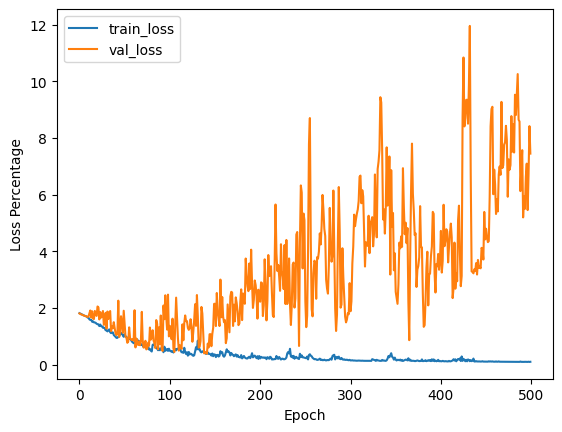

In [33]:
plt.plot(model_train1.history['loss'], label='train_loss')
plt.plot(model_train1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Percentage')
plt.legend()
plt.show()

# Visualizing the train and validation accuracy

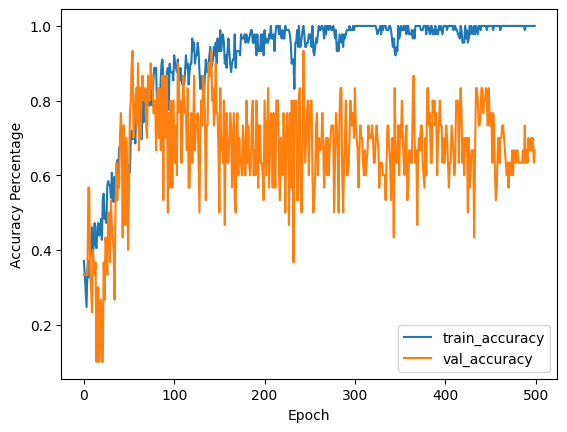

In [34]:
plt.plot(model_train1.history['accuracy'], label='train_accuracy')
plt.plot(model_train1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Percentage')
plt.legend()
plt.show()

# CNN Model

### Optimizer Adam with default learning rate

In [35]:
# Model creation
model2 = Sequential()

In [36]:
# Layer creation
model2.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                 kernel_regularizer=l1(0.0001),
                 input_shape=(256,256,3)))

model2.add(MaxPooling2D(pool_size=2))


model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
         

model2.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
         

model2.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
          

model2.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
          

model2.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
         


model2.add(Flatten())

model2.add(Dense(700, activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(200, activation='relu', kernel_regularizer=l1(0.0001)))
model2.add(Dense(100, activation='relu', kernel_regularizer=l1(0.0001)))
model2.add(Dense(3, activation='softmax'))

In [37]:
# Optimizer - weights & learning rate changes - to reduce loss
model2.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 64)      

In [39]:
# Training the model
checkpoint = ModelCheckpoint(filepath = 'Riceleaf2.h5', verbose = 1, save_best_only=True)

In [40]:
%%time
model_train2 = model2.fit(train_set, 
                        epochs=500, 
                        batch_size = 32,
                        validation_data = valid_set, 
                        callbacks=[checkpoint],
                        verbose = 1)

Epoch 1/500
3/3 [==============================] - ETA: 0s - loss: 1.8883 - accuracy: 0.2472
Epoch 1: val_loss improved from inf to 1.78714, saving model to Riceleaf2.h5
3/3 [==============================] - 11s 4s/step - loss: 1.8883 - accuracy: 0.2472 - val_loss: 1.7871 - val_accuracy: 0.3333
Epoch 2/500
3/3 [==============================] - ETA: 0s - loss: 1.7788 - accuracy: 0.3258
Epoch 2: val_loss improved from 1.78714 to 1.75757, saving model to Riceleaf2.h5
3/3 [==============================] - 8s 3s/step - loss: 1.7788 - accuracy: 0.3258 - val_loss: 1.7576 - val_accuracy: 0.3333
Epoch 3/500
3/3 [==============================] - ETA: 0s - loss: 1.7491 - accuracy: 0.3371
Epoch 3: val_loss improved from 1.75757 to 1.72970, saving model to Riceleaf2.h5
3/3 [==============================] - 8s 3s/step - loss: 1.7491 - accuracy: 0.3371 - val_loss: 1.7297 - val_accuracy: 0.3333
Epoch 4/500
3/3 [==============================] - ETA: 0s - loss: 1.7178 - accuracy: 0.3596
Epoch 4: v

Epoch 29/500
3/3 [==============================] - ETA: 0s - loss: 1.2200 - accuracy: 0.3258
Epoch 29: val_loss did not improve from 1.31624
3/3 [==============================] - 8s 3s/step - loss: 1.2200 - accuracy: 0.3258 - val_loss: 1.3201 - val_accuracy: 0.3333
Epoch 30/500
3/3 [==============================] - ETA: 0s - loss: 1.1878 - accuracy: 0.4045
Epoch 30: val_loss did not improve from 1.31624
3/3 [==============================] - 8s 3s/step - loss: 1.1878 - accuracy: 0.4045 - val_loss: 1.5052 - val_accuracy: 0.4333
Epoch 31/500
3/3 [==============================] - ETA: 0s - loss: 1.1659 - accuracy: 0.4494
Epoch 31: val_loss did not improve from 1.31624
3/3 [==============================] - 8s 3s/step - loss: 1.1659 - accuracy: 0.4494 - val_loss: 1.5873 - val_accuracy: 0.3667
Epoch 32/500
3/3 [==============================] - ETA: 0s - loss: 1.1322 - accuracy: 0.4270
Epoch 32: val_loss did not improve from 1.31624
3/3 [==============================] - 8s 3s/step - lo

3/3 [==============================] - 8s 2s/step - loss: 1.1615 - accuracy: 0.3596 - val_loss: 1.2215 - val_accuracy: 0.3000
Epoch 59/500
3/3 [==============================] - ETA: 0s - loss: 1.1556 - accuracy: 0.3820
Epoch 59: val_loss did not improve from 1.21531
3/3 [==============================] - 7s 3s/step - loss: 1.1556 - accuracy: 0.3820 - val_loss: 1.2166 - val_accuracy: 0.3000
Epoch 60/500
3/3 [==============================] - ETA: 0s - loss: 1.1576 - accuracy: 0.4157
Epoch 60: val_loss improved from 1.21531 to 1.20741, saving model to Riceleaf2.h5
3/3 [==============================] - 8s 3s/step - loss: 1.1576 - accuracy: 0.4157 - val_loss: 1.2074 - val_accuracy: 0.3000
Epoch 61/500
3/3 [==============================] - ETA: 0s - loss: 1.1558 - accuracy: 0.3596
Epoch 61: val_loss did not improve from 1.20741
3/3 [==============================] - 7s 3s/step - loss: 1.1558 - accuracy: 0.3596 - val_loss: 1.2134 - val_accuracy: 0.3667
Epoch 62/500
3/3 [==================

3/3 [==============================] - 8s 3s/step - loss: 1.1416 - accuracy: 0.3596 - val_loss: 1.1754 - val_accuracy: 0.3333
Epoch 89/500
3/3 [==============================] - ETA: 0s - loss: 1.1395 - accuracy: 0.3596
Epoch 89: val_loss improved from 1.17541 to 1.17262, saving model to Riceleaf2.h5
3/3 [==============================] - 7s 3s/step - loss: 1.1395 - accuracy: 0.3596 - val_loss: 1.1726 - val_accuracy: 0.3333
Epoch 90/500
3/3 [==============================] - ETA: 0s - loss: 1.1351 - accuracy: 0.3596
Epoch 90: val_loss improved from 1.17262 to 1.16847, saving model to Riceleaf2.h5
3/3 [==============================] - 8s 3s/step - loss: 1.1351 - accuracy: 0.3596 - val_loss: 1.1685 - val_accuracy: 0.3333
Epoch 91/500
3/3 [==============================] - ETA: 0s - loss: 1.1315 - accuracy: 0.3596
Epoch 91: val_loss improved from 1.16847 to 1.16809, saving model to Riceleaf2.h5
3/3 [==============================] - 8s 3s/step - loss: 1.1315 - accuracy: 0.3596 - val_loss

3/3 [==============================] - ETA: 0s - loss: 1.0837 - accuracy: 0.4494
Epoch 147: val_loss did not improve from 1.13187
3/3 [==============================] - 6s 2s/step - loss: 1.0837 - accuracy: 0.4494 - val_loss: 1.1591 - val_accuracy: 0.3333
Epoch 148/500
3/3 [==============================] - ETA: 0s - loss: 1.0767 - accuracy: 0.4382
Epoch 148: val_loss did not improve from 1.13187
3/3 [==============================] - 6s 2s/step - loss: 1.0767 - accuracy: 0.4382 - val_loss: 1.1750 - val_accuracy: 0.4000
Epoch 149/500
3/3 [==============================] - ETA: 0s - loss: 1.1065 - accuracy: 0.3820
Epoch 149: val_loss did not improve from 1.13187
3/3 [==============================] - 6s 2s/step - loss: 1.1065 - accuracy: 0.3820 - val_loss: 1.1787 - val_accuracy: 0.4000
Epoch 150/500
3/3 [==============================] - ETA: 0s - loss: 1.0641 - accuracy: 0.4831
Epoch 150: val_loss did not improve from 1.13187
3/3 [==============================] - 6s 2s/step - loss: 1.

3/3 [==============================] - ETA: 0s - loss: 0.9967 - accuracy: 0.4831
Epoch 177: val_loss did not improve from 1.03690
3/3 [==============================] - 6s 2s/step - loss: 0.9967 - accuracy: 0.4831 - val_loss: 1.2301 - val_accuracy: 0.3667
Epoch 178/500
3/3 [==============================] - ETA: 0s - loss: 0.9851 - accuracy: 0.4157
Epoch 178: val_loss did not improve from 1.03690
3/3 [==============================] - 6s 2s/step - loss: 0.9851 - accuracy: 0.4157 - val_loss: 1.3393 - val_accuracy: 0.5333
Epoch 179/500
3/3 [==============================] - ETA: 0s - loss: 0.9941 - accuracy: 0.4831
Epoch 179: val_loss did not improve from 1.03690
3/3 [==============================] - 6s 2s/step - loss: 0.9941 - accuracy: 0.4831 - val_loss: 1.3751 - val_accuracy: 0.4000
Epoch 180/500
3/3 [==============================] - ETA: 0s - loss: 0.9425 - accuracy: 0.5169
Epoch 180: val_loss did not improve from 1.03690
3/3 [==============================] - 6s 2s/step - loss: 0.

Epoch 207/500
3/3 [==============================] - ETA: 0s - loss: 0.9482 - accuracy: 0.5506
Epoch 207: val_loss did not improve from 0.84738
3/3 [==============================] - 6s 2s/step - loss: 0.9482 - accuracy: 0.5506 - val_loss: 0.8570 - val_accuracy: 0.5000
Epoch 208/500
3/3 [==============================] - ETA: 0s - loss: 0.8577 - accuracy: 0.5618
Epoch 208: val_loss improved from 0.84738 to 0.82120, saving model to Riceleaf2.h5
3/3 [==============================] - 6s 2s/step - loss: 0.8577 - accuracy: 0.5618 - val_loss: 0.8212 - val_accuracy: 0.6333
Epoch 209/500
3/3 [==============================] - ETA: 0s - loss: 0.9264 - accuracy: 0.5169
Epoch 209: val_loss improved from 0.82120 to 0.80299, saving model to Riceleaf2.h5
3/3 [==============================] - 7s 2s/step - loss: 0.9264 - accuracy: 0.5169 - val_loss: 0.8030 - val_accuracy: 0.6667
Epoch 210/500
3/3 [==============================] - ETA: 0s - loss: 0.8525 - accuracy: 0.5618
Epoch 210: val_loss did not

Epoch 266/500
3/3 [==============================] - ETA: 0s - loss: 0.6201 - accuracy: 0.7303
Epoch 266: val_loss did not improve from 0.39555
3/3 [==============================] - 6s 2s/step - loss: 0.6201 - accuracy: 0.7303 - val_loss: 0.5612 - val_accuracy: 0.8667
Epoch 267/500
3/3 [==============================] - ETA: 0s - loss: 0.5722 - accuracy: 0.7079
Epoch 267: val_loss did not improve from 0.39555
3/3 [==============================] - 6s 2s/step - loss: 0.5722 - accuracy: 0.7079 - val_loss: 0.7373 - val_accuracy: 0.8667
Epoch 268/500
3/3 [==============================] - ETA: 0s - loss: 0.5802 - accuracy: 0.7079
Epoch 268: val_loss did not improve from 0.39555
3/3 [==============================] - 6s 2s/step - loss: 0.5802 - accuracy: 0.7079 - val_loss: 0.4300 - val_accuracy: 0.9333
Epoch 269/500
3/3 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.7303
Epoch 269: val_loss did not improve from 0.39555
3/3 [==============================] - 6s 2s/s

3/3 [==============================] - ETA: 0s - loss: 0.5083 - accuracy: 0.7640
Epoch 326: val_loss did not improve from 0.36355
3/3 [==============================] - 6s 2s/step - loss: 0.5083 - accuracy: 0.7640 - val_loss: 0.6025 - val_accuracy: 0.9000
Epoch 327/500
3/3 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.7528
Epoch 327: val_loss did not improve from 0.36355
3/3 [==============================] - 6s 2s/step - loss: 0.4835 - accuracy: 0.7528 - val_loss: 1.1760 - val_accuracy: 0.9333
Epoch 328/500
3/3 [==============================] - ETA: 0s - loss: 0.4948 - accuracy: 0.7978
Epoch 328: val_loss did not improve from 0.36355
3/3 [==============================] - 6s 2s/step - loss: 0.4948 - accuracy: 0.7978 - val_loss: 0.8464 - val_accuracy: 0.9000
Epoch 329/500
3/3 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.8090
Epoch 329: val_loss did not improve from 0.36355
3/3 [==============================] - 6s 2s/step - loss: 0.

3/3 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.7865
Epoch 386: val_loss did not improve from 0.27897
3/3 [==============================] - 6s 2s/step - loss: 0.4544 - accuracy: 0.7865 - val_loss: 0.4558 - val_accuracy: 0.9333
Epoch 387/500
3/3 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.8090
Epoch 387: val_loss did not improve from 0.27897
3/3 [==============================] - 6s 2s/step - loss: 0.4465 - accuracy: 0.8090 - val_loss: 0.3450 - val_accuracy: 0.8000
Epoch 388/500
3/3 [==============================] - ETA: 0s - loss: 0.4508 - accuracy: 0.7978
Epoch 388: val_loss did not improve from 0.27897
3/3 [==============================] - 6s 2s/step - loss: 0.4508 - accuracy: 0.7978 - val_loss: 0.4045 - val_accuracy: 0.9000
Epoch 389/500
3/3 [==============================] - ETA: 0s - loss: 0.3996 - accuracy: 0.8090
Epoch 389: val_loss did not improve from 0.27897
3/3 [==============================] - 7s 3s/step - loss: 0.

3/3 [==============================] - 6s 2s/step - loss: 0.4095 - accuracy: 0.8315 - val_loss: 0.6420 - val_accuracy: 0.8000
Epoch 417/500
3/3 [==============================] - ETA: 0s - loss: 0.3689 - accuracy: 0.8652
Epoch 417: val_loss did not improve from 0.27897
3/3 [==============================] - 6s 2s/step - loss: 0.3689 - accuracy: 0.8652 - val_loss: 0.3307 - val_accuracy: 0.9000
Epoch 418/500
3/3 [==============================] - ETA: 0s - loss: 0.3743 - accuracy: 0.8539
Epoch 418: val_loss did not improve from 0.27897
3/3 [==============================] - 6s 2s/step - loss: 0.3743 - accuracy: 0.8539 - val_loss: 0.3388 - val_accuracy: 0.9000
Epoch 419/500
3/3 [==============================] - ETA: 0s - loss: 0.5292 - accuracy: 0.7640
Epoch 419: val_loss did not improve from 0.27897
3/3 [==============================] - 6s 2s/step - loss: 0.5292 - accuracy: 0.7640 - val_loss: 0.4608 - val_accuracy: 0.8000
Epoch 420/500
3/3 [==============================] - ETA: 0s - l

Epoch 447/500
3/3 [==============================] - ETA: 0s - loss: 0.3763 - accuracy: 0.8202
Epoch 447: val_loss did not improve from 0.23907
3/3 [==============================] - 7s 2s/step - loss: 0.3763 - accuracy: 0.8202 - val_loss: 0.4661 - val_accuracy: 0.8000
Epoch 448/500
3/3 [==============================] - ETA: 0s - loss: 0.4038 - accuracy: 0.8090
Epoch 448: val_loss did not improve from 0.23907
3/3 [==============================] - 6s 2s/step - loss: 0.4038 - accuracy: 0.8090 - val_loss: 0.5587 - val_accuracy: 0.8000
Epoch 449/500
3/3 [==============================] - ETA: 0s - loss: 0.4368 - accuracy: 0.8315
Epoch 449: val_loss did not improve from 0.23907
3/3 [==============================] - 6s 2s/step - loss: 0.4368 - accuracy: 0.8315 - val_loss: 0.4493 - val_accuracy: 0.8000
Epoch 450/500
3/3 [==============================] - ETA: 0s - loss: 0.3733 - accuracy: 0.8652
Epoch 450: val_loss did not improve from 0.23907
3/3 [==============================] - 6s 2s/s

In [41]:
model2.load_weights('Riceleaf2.h5')

# Checking the Train score,accuracy,loss

In [42]:
tscore2 = model2.evaluate(train_set, verbose=0)
taccuracy2 = 100 * tscore2[1]
tloss2 = 100 * tscore2[0]
print(tscore2)
print(tloss2)
print(taccuracy2)

[0.24981719255447388, 0.898876428604126]
24.981719255447388
89.8876428604126


# Checking the validation score,accuracy,loss

In [43]:
vscore2 = model2.evaluate(valid_set, verbose=0)
vaccuracy2 = 100 * vscore2[1]
vloss2 = 100 * vscore2[0]
print(vscore2)
print(vloss2)
print(vaccuracy2)

[0.4610024690628052, 0.8999999761581421]
46.10024690628052
89.99999761581421


# Visualizing the train and validation loss

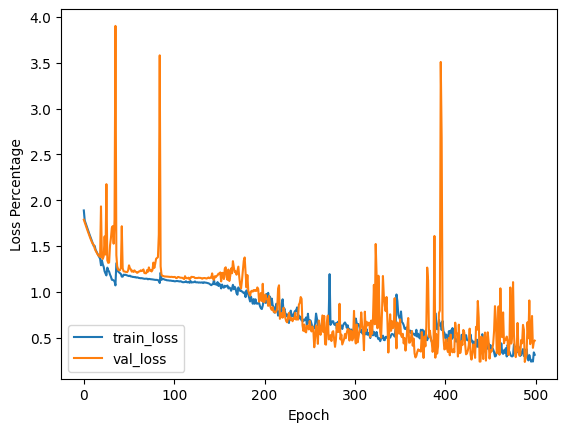

In [44]:
plt.plot(model_train2.history['loss'], label='train_loss')
plt.plot(model_train2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Percentage')
plt.legend()
plt.show()

# Visualizing the train and validation accuracy

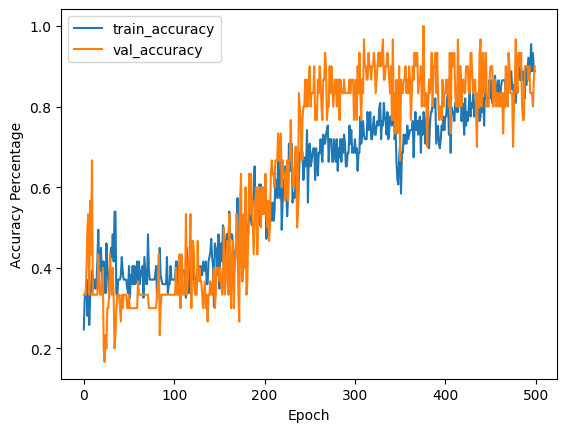

In [45]:
plt.plot(model_train2.history['accuracy'], label='train_accuracy')
plt.plot(model_train2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Percentage')
plt.legend()
plt.show()

## Comparison between all three learning rates

In [46]:
print('Accuracy & Validation accuracy of learning rate 0.0001 :', taccuracy, vaccuracy)
print('Accuracy & Validation accuracy of learning rate 0.0005 :', taccuracy1, vaccuracy1)
print('Accuracy & Validation accuracy of learning rate 0.001 :', taccuracy2, vaccuracy2)
print('Most accurate of train accuracy: ', max(taccuracy, taccuracy1, taccuracy2))
print('Most accurate of valid accuracy: ', max(vaccuracy, vaccuracy1, vaccuracy2))
print('Loss in train & valid dataset for learning rate 0.0001 :', tloss, vloss)
print('Loss in train & valid dataset for learning rate 0.0005 :', tloss1, vloss1)
print('Loss in train & valid dataset for learning rate 0.001 :', tloss2, vloss2)
print('More loss in training set : ', max(tloss, tloss1, tloss2))
print('More loss in valid set : ', max(vloss, vloss1, vloss2))

Accuracy & Validation accuracy of learning rate 0.0001 : 96.6292142868042 76.66666507720947
Accuracy & Validation accuracy of learning rate 0.0005 : 95.50561904907227 76.66666507720947
Accuracy & Validation accuracy of learning rate 0.001 : 89.8876428604126 89.99999761581421
Most accurate of train accuracy:  96.6292142868042
Most accurate of valid accuracy:  89.99999761581421
Loss in train & valid dataset for learning rate 0.0001 : 37.816834449768066 90.17657041549683
Loss in train & valid dataset for learning rate 0.0005 : 32.295018434524536 64.31770920753479
Loss in train & valid dataset for learning rate 0.001 : 24.981719255447388 46.10024690628052
More loss in training set :  37.816834449768066
More loss in valid set :  90.17657041549683


## Image Prediction

1/1 [==============================] - 0s 210ms/step


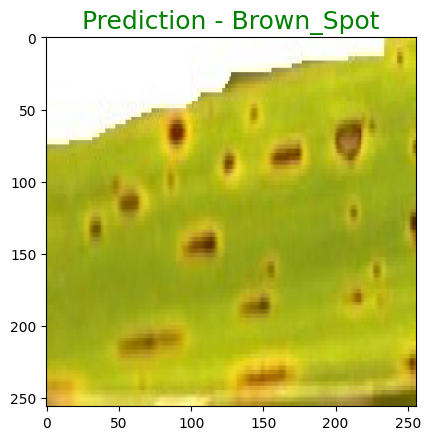

In [47]:
leaf_prediction_model = models.load_model('Riceleaf.h5')

def leaf_prediction(filename, model):
    image = load_img(filename, target_size=(256,256))
    imge_array = img_to_array(image)
    img_processed = np.expand_dims(imge_array, axis=0)
    img_processed /=255

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    plt.title('Prediction - {}'.format(str(class_names[index]).title()),
               size = 18, color='green')
    plt.imshow(imge_array)
    
leaf_prediction(r'D:\Computer courses\Internship project\PRCP-1001-RiceLeaf\Data\Brown_spot\Brown_spot_14.jpg', leaf_prediction_model)

# SUMMARY:
     * CNN is an algorithm of deep learning techniques that has been successfully invoked for handling
       computer vision issues such as picture classification, object segmentation, and image analysis. CNN
       has been used to address the classification of Rice leaf diseases accurate detection and classification
       of rice leaf disease.

    * The dataset provided contains 120 jpg images of disease-infected rice leaves. The images are grouped
      into 3 classes based on the type of disease. There are 40 images in each class.

# Classes:
    • Leaf smut: small black linear lesions on leaf blades, leaf tips may turn grey and dry.
    • Bacterial blight: elongated lesions near the leaf tips and margins, and turns white to yellow
      and then grey due to fungal attack.
    • Brown spot: dark brown colored and round to oval shaped lesions on rice leaves

## METHODOLOGY FOLLOWED

1. For the accurate detection and classification of rice leaf disease the CNN approach has been used
where the images will go through preprocessing stages, where images will be subjected to background
removal, resizing, and enhancement. 
2. Data augmentation is also performed to increase the
size of the dataset. The data augmentation technique simply applies minor changes to the original
images to produce new distinct images. The minor changes include rotation, scale-in/scale-out,
and translation. 
3. The feature reduction is performed using the flatten, dense, and softmax layers. 
4. The last layers of these algorithms perform the classification and evaluated using the accuracy metrices. The comparative
study among these algorithms has been carried out for better representation and understanding of
the accuracy of the model trained with different algorithms.

## INSIGHTS FROM VARIOUS CNN APPROACHS

1. In CNN method, the ADAM optimizer with learning rate 0.0001, accuracy is 96.629%
2. In CNN method, the ADAM optimizer with learning rate 0.0005, accuracy is 95.505%
3. In CNN method, the ADAM optimizer with learning rate 0.001, accuracy is 89.887%

## CONCLUSION

CNN are widely regarded as the most successful technique for any prediction problem involving
input image data. Various CNN methods with learning rate approach have been studied for
the classification of rice leaf diseases. 

## CHALLENGES FACED

The major challenges of recognizing rice leaf diseases are the issue image quality and backgrounds.
This condition has restricted the model performance. Also, there were only 40 images in each
disease class which also affected our model performance.

## FLASK Integration

In [49]:
import os
import uuid
import flask
import urllib
import pickle,sklearn
from PIL import Image
from tensorflow.keras.models import load_model
from flask import Flask , render_template  , request , send_file
from tensorflow.keras.preprocessing.image import load_img , img_to_array


app = Flask(__name__)

#model=pickle.load(open("PTID-CDS-AUG-23-1602A-PRCP-1001-RiceLeaf_model.pkl","rb"))
BASE_DIR = os.path.dirname(os.path.abspath('Riceleaf1.h5'))
model = load_model(os.path.join(BASE_DIR ,'Riceleaf1.h5'))


ALLOWED_EXT = set(['jpg', 'JPG' , 'jpeg' , 'png' , 'jfif'])

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1] in ALLOWED_EXT

classes = ['Bacterial_leaf_blight','Brown_spot','Leaf_smut']


def predict(filename , model):
    img = load_img(filename , target_size = (256 , 256))
    img = img_to_array(img)
    img = img.reshape(1 , 256 ,256 ,3)

    img = img.astype('float32')
    img = img/255.0
    result = model.predict(img)

    dict_result = {}
    for i in range(3):
        dict_result[result[0][i]] = classes[i]

    res = result[0]
    res.sort()
    res = res[::-1]
    prob = res[:3]
    
    prob_result = []
    class_result = []
    for i in range(3):
        prob_result.append((prob[i]*100).round(2))
        class_result.append(dict_result[prob[i]])

    return class_result , prob_result




@app.route('/')
def home():
        return render_template("Rice.html")

@app.route('/Rice_leaf' , methods = ['GET' , 'POST'])
def Rice_leaf():
    error = ''
    target_img = os.path.join(os.getcwd() , 'static\\images')
    if request.method == 'POST':
        if(request.form):
            link = request.form.get('link')
            try :
                resource = urllib.request.urlopen(link)
                unique_filename = str(uuid.uuid4())
                filename = unique_filename+".jpg"
                img_path = os.path.join(target_img , filename)
                output = open(img_path , "wb")
                output.write(resource.read())
                output.close()
                img = filename

                class_result , prob_result = predict(img_path , model)

                predictions = {
                      "class1":class_result[0],
                        "class2":class_result[1],
                        "class3":class_result[2],
                        "prob1": prob_result[0],
                        "prob2": prob_result[1],
                        "prob3": prob_result[2],
                }

            except Exception as e : 
                print(str(e))
                error = 'This image from this site is not accesible or inappropriate input'

            if(len(error) == 0):
                return  render_template('Rice_leaf-1.html' , img  = img , predictions = predictions)
            else:
                return render_template('Rice.html' , error = error) 

            
        elif (request.files):
            file = request.files['file']
            if file and allowed_file(file.filename):
                file.save(os.path.join(target_img , file.filename))
                img_path = os.path.join(target_img , file.filename)
                img = file.filename

                class_result , prob_result = predict(img_path , model)

                predictions = {
                      "class1":class_result[0],
                        "class2":class_result[1],
                        "class3":class_result[2],
                        "prob1": prob_result[0],
                        "prob2": prob_result[1],
                        "prob3": prob_result[2],
                }

            else:
                error = "Please upload images of jpg , jpeg and png extension only"

            if(len(error) == 0):
                return  render_template('Rice_leaf-1.html' , img  = img , predictions = predictions)
            else:
                return render_template('Rice.html' , error = error)

    else:
        return render_template('Rice.html')

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Sep/2023 21:01:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2023 21:01:13] "GET /static/css/normalize.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:13] "GET /static/css/grid.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:13] "GET /static/css/style.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:13] "GET /static/css/front.jpg HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:13] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 104ms/step


127.0.0.1 - - [10/Sep/2023 21:01:40] "POST /Rice_leaf HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2023 21:01:40] "GET /static/css/normalize.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:40] "GET /static/css/styleSucc.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:40] "GET /static/css/grid.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2023 21:01:40] "GET /static/images/Brown_spot_7.jpg HTTP/1.1" 200 -
